# Parkinsons Disease detection

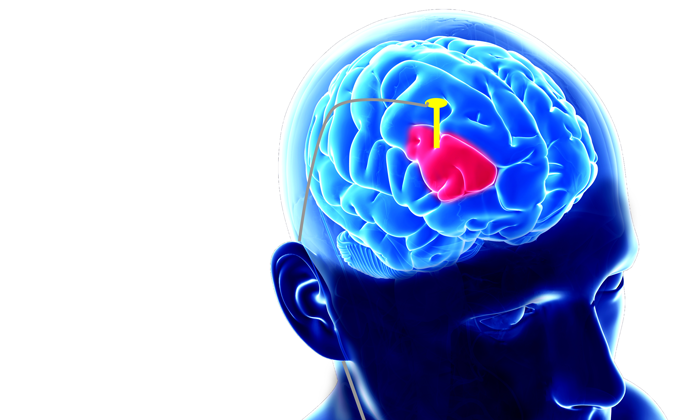

#### Parkinson's disease is a brain disorder that leads to shaking, stiffness, and difficulty with walking, balance, and coordination. Parkinson's symptoms usually begin gradually and get worse over time. As the disease progresses, people may have difficulty walking and talking.


Parkinsons can affect the patient's vocal organs in the similar way it affects limbs and hands so just by monitoring the vocal cords in the larynx (vocal box), we are now able to detect if the person has/is developing Parkinsons or not.


### Built-in packages


In [226]:
import warnings
import re
warnings.filterwarnings("ignore")

### Third party packages


In [227]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import seaborn as sns
import matplotlib.pyplot as plt

### Read the CSV file and display first 5 rows


In [228]:
df = pd.read_csv("parkinsons.csv")

df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Changing Column names for better readability

In [229]:
df.columns = [i.replace(" ", "_").replace("(%)", "_percentage").replace("(dB)", "_db").replace(":", "_").lower() for i in df.columns]
df.columns = [re.sub(r"\((.+)\)", "", i) for i in df.columns]

df.head()

,name,mdvp_fo,mdvp_fhi,mdvp_flo,mdvp_jitter_percentage,mdvp_jitter,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,shimmer_apq3,shimmer_apq5,mdvp_apq,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


### Checking The shape of the Data

In [237]:
print(f"The shape of the DataFrame is: {df.shape}, which means there are {df.shape[0]} rows and {df.shape[1]} columns.")

The shape of the DataFrame is: (195, 24), which means there are 195 rows and 24 columns.


# Cheking Information of data

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    195 non-null    object 
 1   mdvp_fo                 195 non-null    float64
 2   mdvp_fhi                195 non-null    float64
 3   mdvp_flo                195 non-null    float64
 4   mdvp_jitter_percentage  195 non-null    float64
 5   mdvp_jitter             195 non-null    float64
 6   mdvp_rap                195 non-null    float64
 7   mdvp_ppq                195 non-null    float64
 8   jitter_ddp              195 non-null    float64
 9   mdvp_shimmer            195 non-null    float64
 10  mdvp_shimmer_db         195 non-null    float64
 11  shimmer_apq3            195 non-null    float64
 12  shimmer_apq5            195 non-null    float64
 13  mdvp_apq                195 non-null    float64
 14  shimmer_dda             195 non-null    fl

### Check if any of the columns have null values


In [239]:
print(df.isnull().sum())

name                      0
mdvp_fo                   0
mdvp_fhi                  0
mdvp_flo                  0
mdvp_jitter_percentage    0
mdvp_jitter               0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
status                    0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
dtype: int64


### Five Number Summary of data

In [240]:
df_summary = df.describe()
df_summary

,mdvp_fo,mdvp_fhi,mdvp_flo,mdvp_jitter_percentage,mdvp_jitter,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,shimmer_apq3,shimmer_apq5,mdvp_apq,shimmer_dda,nhr,hnr,status,rpde,dfa,spread1,spread2,d2,ppe
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [241]:
df.isna().sum()

name                      0
mdvp_fo                   0
mdvp_fhi                  0
mdvp_flo                  0
mdvp_jitter_percentage    0
mdvp_jitter               0
mdvp_rap                  0
mdvp_ppq                  0
jitter_ddp                0
mdvp_shimmer              0
mdvp_shimmer_db           0
shimmer_apq3              0
shimmer_apq5              0
mdvp_apq                  0
shimmer_dda               0
nhr                       0
hnr                       0
status                    0
rpde                      0
dfa                       0
spread1                   0
spread2                   0
d2                        0
ppe                       0
dtype: int64

### Heatmap plotting

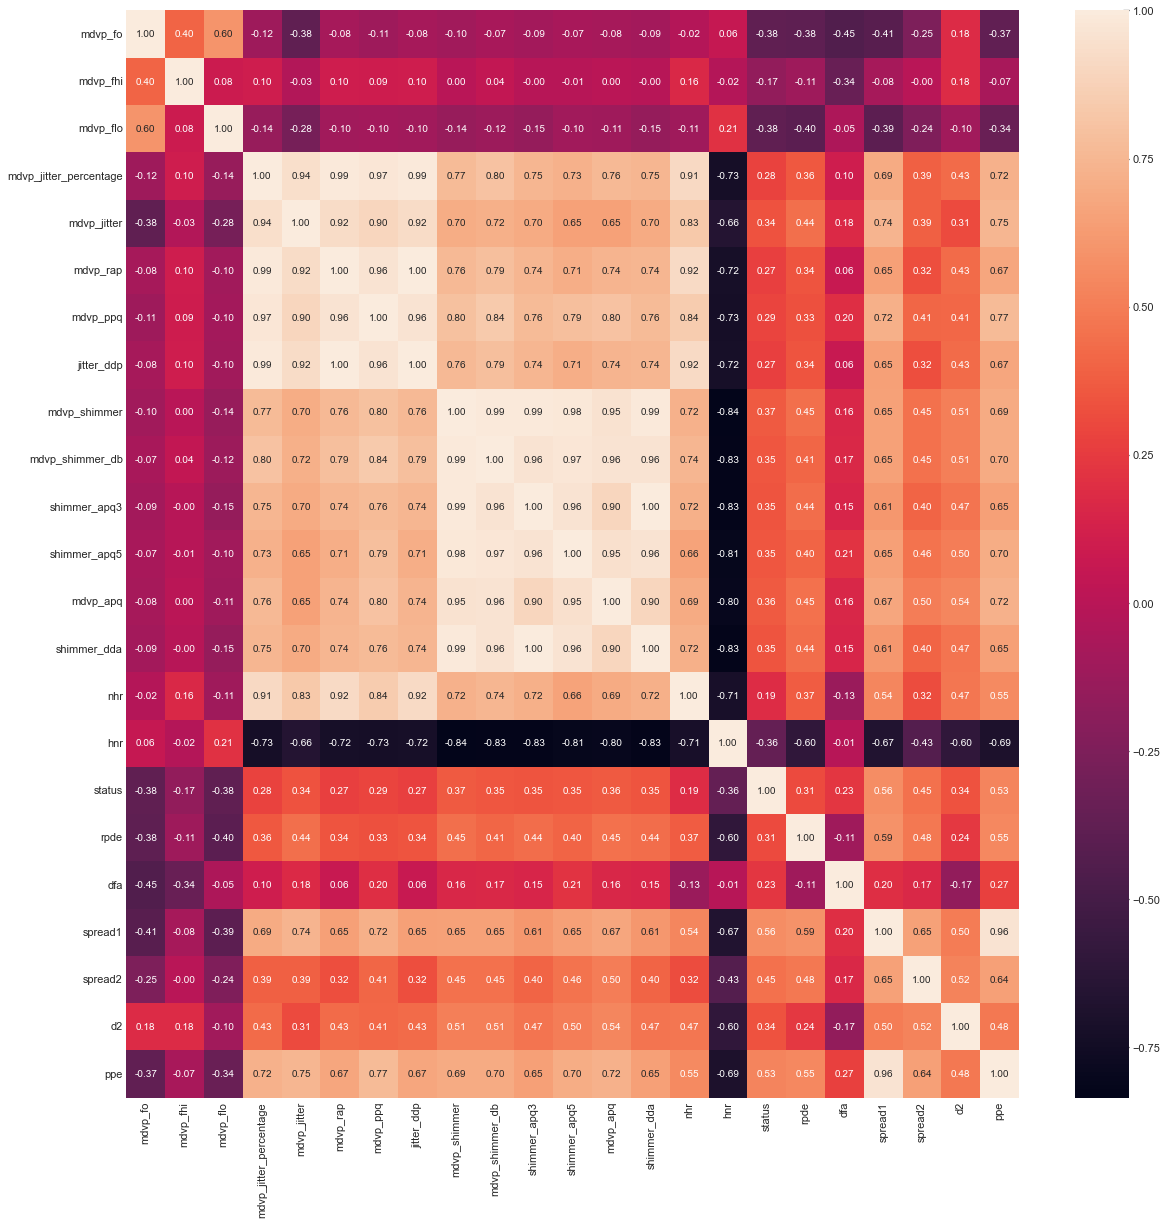

In [242]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), fmt='.2f', annot=True);

## Univariate and Bivariate analysis

In [243]:
# A function that returns value counts for a column split by status
def groupby_get_cc_count(tdf, col):
    tdf = tdf.groupby([col, "status"])["status"].count().reset_index(level = 0)
    tdf.columns = [col, "count"]
    tdf = tdf.reset_index()
    return tdf

In [244]:
df[["mdvp_fo", "mdvp_jitter", "status"]]

,mdvp_fo,mdvp_jitter,status
0,119.992,0.00007,1
1,122.400,0.00008,1
2,116.682,0.00009,1
3,116.676,0.00009,1
4,116.014,0.00011,1
...,...,...,...
190,174.188,0.00003,0
191,209.516,0.00003,0
192,174.688,0.00008,0
193,198.764,0.00004,0


### Charts Plotting for Five Number Summary 

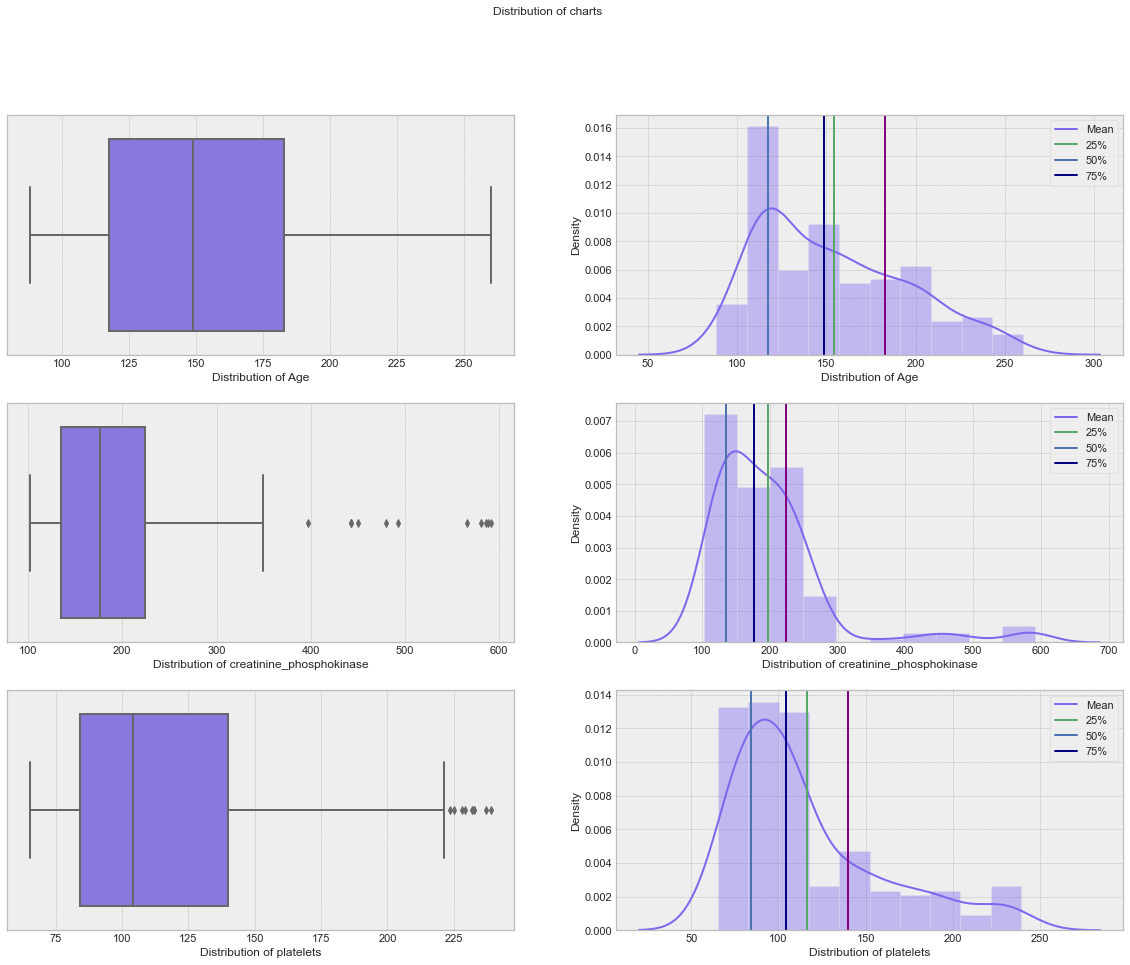

In [245]:
def draw_axvlines(plt, col):
    mean = df_summary.loc["mean", col]
    q1 = df_summary.loc["25%", col]
    q2 = df_summary.loc["50%", col]
    q3 = df_summary.loc["75%", col]
    plt.axvline(mean, color = "g");              # Plotting a line to mark the mean 
    plt.axvline(q1, color = "b");                # Plotting a line to mark Q1 
    plt.axvline(q2, color = "navy");             # Plotting a line to mark Q2 
    plt.axvline(q3, color = "purple");           # Plotting a line to mark Q3
    plt.legend({"Mean": mean, "25%" : q1, "50%" : q2, "75%" : q3});

fig, axes = plt.subplots(3, 2, figsize = (20,15));
fig.suptitle('Distribution of charts');


# Create boxplot to show distribution of Age
sns.boxplot(df["mdvp_fo"], ax = axes[0][0], color = "mediumslateblue");
axes[0][0].set(xlabel = 'Distribution of Age');

pp = sns.distplot(df["mdvp_fo"], ax = axes[0][1], bins = 10, color = "mediumslateblue");
axes[0][1].set(xlabel = 'Distribution of Age');
draw_axvlines(pp, "mdvp_fo");


# Create boxplot to show distribution of creatinine_phosphokinase
sns.boxplot(df["mdvp_fhi"], ax = axes[1][0], color = "mediumslateblue");
axes[1][0].set(xlabel = 'Distribution of creatinine_phosphokinase');

pp = sns.distplot(df["mdvp_fhi"], ax = axes[1][1], bins = 10, color = "mediumslateblue");
axes[1][1].set(xlabel = 'Distribution of creatinine_phosphokinase');
draw_axvlines(pp, "mdvp_fhi")


# Create boxplot to show distribution of platelets
sns.boxplot(df["mdvp_flo"], ax = axes[2][0], color = "mediumslateblue");
axes[2][0].set(xlabel = 'Distribution of platelets');

pp = sns.distplot(df["mdvp_flo"], ax = axes[2][1], color = "mediumslateblue");
axes[2][1].set(xlabel = 'Distribution of platelets');
draw_axvlines(pp, "mdvp_flo")

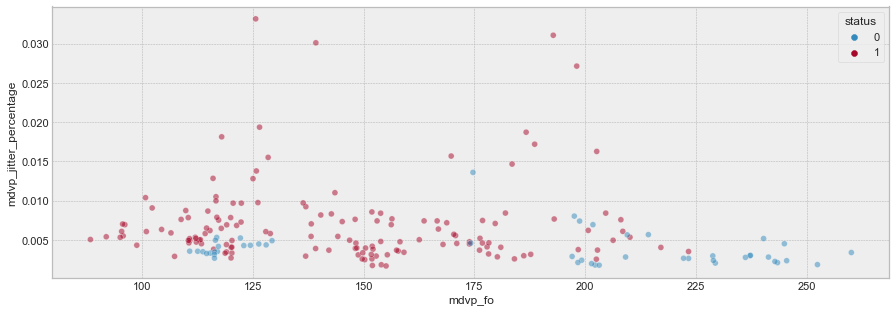

In [246]:
plt.figure(figsize = (15, 5))
sns.scatterplot(x = "mdvp_fo", y = "mdvp_jitter_percentage", data = df[["mdvp_fo", "mdvp_jitter_percentage", "status"]], hue = "status", alpha = 0.5);

From the above plot, we can see that the people without Parkinsons have their fundamental frequencies that is either high or very low and the percentage of jitter is usually lower that 0.005%.

In [247]:
df_train = df.copy().drop(columns=["name"])
col_names = df_train.columns.tolist()
target_col = ["status"]
col_names.remove(target_col[0])
df_train = df_train[col_names + target_col]

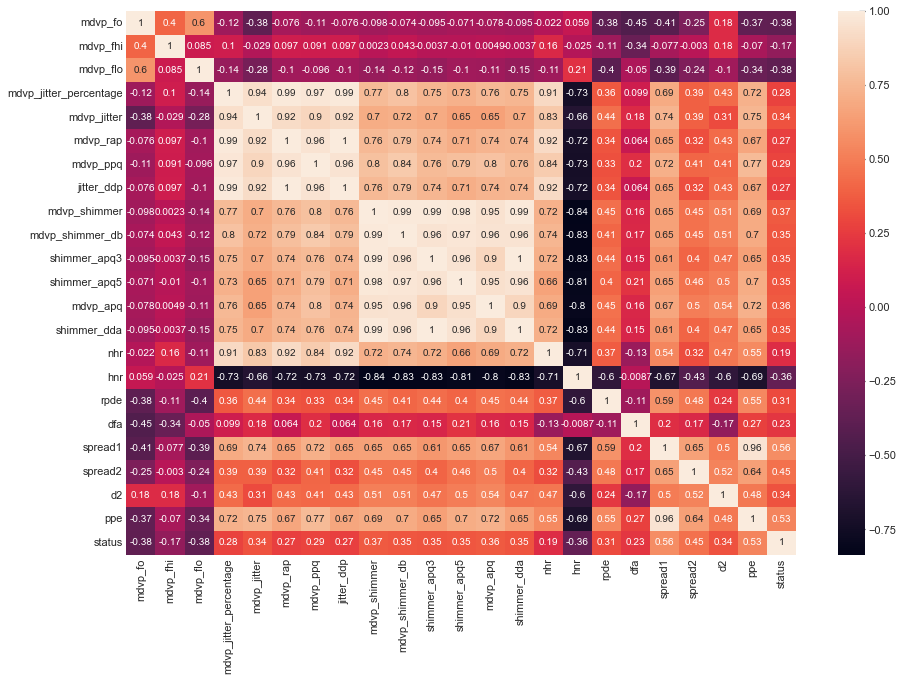

In [248]:
plt.figure(figsize=(15,10))
corr = df_train.corr()
sns.heatmap(corr, annot=True, fmt='.2g');

## Standardization (Scaling)

In [249]:
std = StandardScaler()

### Standardize the columns to get them on the same scale

In [250]:
scaled = std.fit_transform(df_train[col_names])     
scaled = pd.DataFrame(scaled, columns=col_names)

df_train = pd.concat([scaled, df_train[target_col]], axis=1)

df_train.head()

,mdvp_fo,mdvp_fhi,mdvp_flo,mdvp_jitter_percentage,mdvp_jitter,mdvp_rap,mdvp_ppq,jitter_ddp,mdvp_shimmer,mdvp_shimmer_db,shimmer_apq3,shimmer_apq5,mdvp_apq,shimmer_dda,nhr,hnr,rpde,dfa,spread1,spread2,d2,ppe,status
0,-0.829300,-0.436165,-0.952037,0.334914,0.749759,0.132963,0.760800,0.131755,0.745985,0.739536,0.607859,1.119147,0.332985,0.607532,-0.067893,-0.193225,-0.807838,1.760814,0.801323,0.480477,-0.210531,0.868886,1
1,-0.770972,-0.530974,-0.057721,0.715418,1.037674,0.453892,1.276809,0.452684,1.681731,1.768464,1.547912,2.276504,1.159454,1.548254,-0.137843,-0.634508,-0.387524,1.837562,1.479853,1.311185,0.275077,1.803605,1
2,-0.909476,-0.723168,-0.109875,0.884991,1.325589,0.720770,1.585687,0.721813,1.202693,1.027636,1.175643,1.726176,0.699187,1.175323,-0.291633,-0.279760,-0.662075,1.942048,1.141445,1.017682,-0.103629,1.402661,1
3,-0.909622,-0.649092,-0.114229,0.775389,1.325589,0.578885,1.284076,0.577677,1.340396,1.207698,1.340547,1.848749,0.806859,1.340229,-0.280719,-0.281346,-0.613134,1.832380,1.440945,1.293840,0.062145,1.806954,1
4,-0.925657,-0.606245,-0.130608,1.368893,1.901418,1.095750,2.047187,1.096793,1.836448,1.552389,1.899444,2.532491,1.216839,1.899461,-0.178026,-0.506745,-0.783021,1.909364,1.780940,0.096195,-0.130026,2.267082,1


In [251]:
len(df_train[col_names].columns)

22

## Train and Test Split  80 : 20 ratio

In [252]:
X = df_train[col_names]      # Contains the independent columns 
y = df_train[target_col]     # Our target column

In [253]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
y_train = y_train["status"]
y_test = y_test["status"]

In [254]:
conf_matrix_all = {}

def parkinsons_disease_prediction(name, algo, training_x, testing_x, training_y, testing_y, plot) :
    algo.fit(training_x,training_y)                           # Fit the training data set to the algorithm passed.
    predictions = algo.predict(testing_x)                     # Get all predictions
    probabilities = algo.predict_proba(testing_x)             # Get probablities of predictions

    conf_matrix = confusion_matrix(testing_y, predictions)    # Get confusion matrix using the predictions
    tn, fp, fn, tp = conf_matrix.ravel()
    
    conf_matrix_all[name] = conf_matrix                       # Save confusion matrix values to a dictionary
    
    print("Classification report:")                           # Print the classification report
    print(classification_report(testing_y, predictions))
  
    model_roc_auc = roc_auc_score(testing_y, predictions)           # Get the Area under the curve number
    fpr,tpr,thresholds = roc_curve(testing_y, probabilities[:,1])   # Get False postive rate and true positive rate
    
    print ("Area under the curve: ", model_roc_auc)
    
    
    if plot:
        fig, axes = plt.subplots(1,2, figsize=(20, 7))
        conf_matrix = np.flip(conf_matrix)
        
        labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
        labels = np.core.defchararray.add(conf_matrix.astype(str), labels)
        sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[0], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0]);                                           # Plot the confusion matrix
        axes[0].set(xlabel='Predicted', ylabel='Actual')

        plt.title('Receiver Operating Characteristic')
        sns.lineplot(fpr, tpr, ax=axes[1])                                         # Plot the ROC curve
        plt.plot([0, 1], [0, 1],'--')                                              # Plot the diagonal line
        axes[1].set_xlim([0, 1])                                                   # Set x-axis limit to 0 and 1
        axes[1].set_ylim([0, 1])                                                   # Set y-axis limit to 0 and 1
        axes[1].set(xlabel = 'False Positive Rate', ylabel = 'True Positive Rate');
        plt.show();

### Logistic Regression

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39

Area under the curve:  0.780241935483871


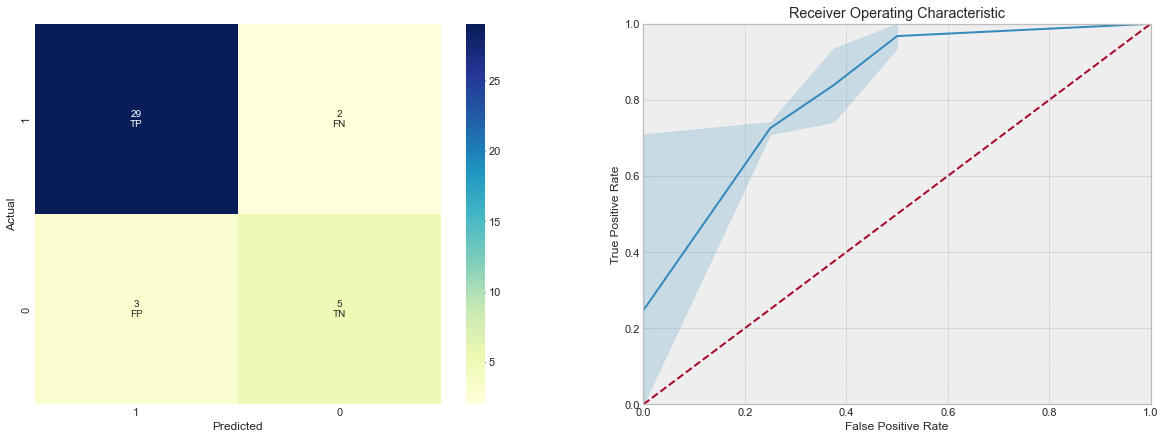

In [255]:
lr  = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, penalty="l1", solver='liblinear')

parkinsons_disease_prediction("Logistic Regression", lr, x_train, x_test, y_train, y_test, plot = True)

### K-nearest Neighbors

Classification report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       1.00      0.97      0.98        31

    accuracy                           0.97        39
   macro avg       0.94      0.98      0.96        39
weighted avg       0.98      0.97      0.97        39

Area under the curve:  0.9838709677419355


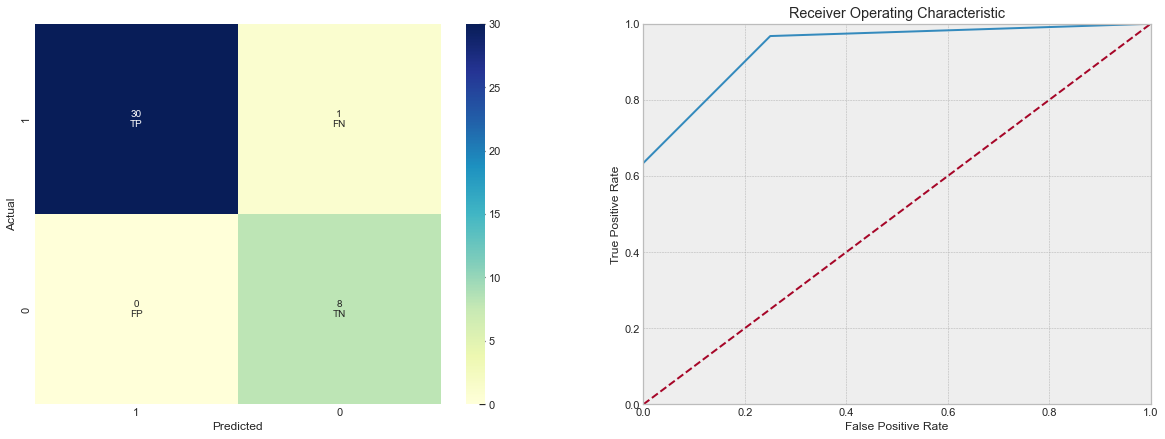

In [256]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan', metric_params=None, n_neighbors = 2, weights='distance')

parkinsons_disease_prediction("K-Nearest Neighbours", knn, x_train, x_test, y_train, y_test, plot=True)

### Naive Bayes

Classification report:
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         8
           1       1.00      0.61      0.76        31

    accuracy                           0.69        39
   macro avg       0.70      0.81      0.67        39
weighted avg       0.88      0.69      0.72        39

Area under the curve:  0.8064516129032258


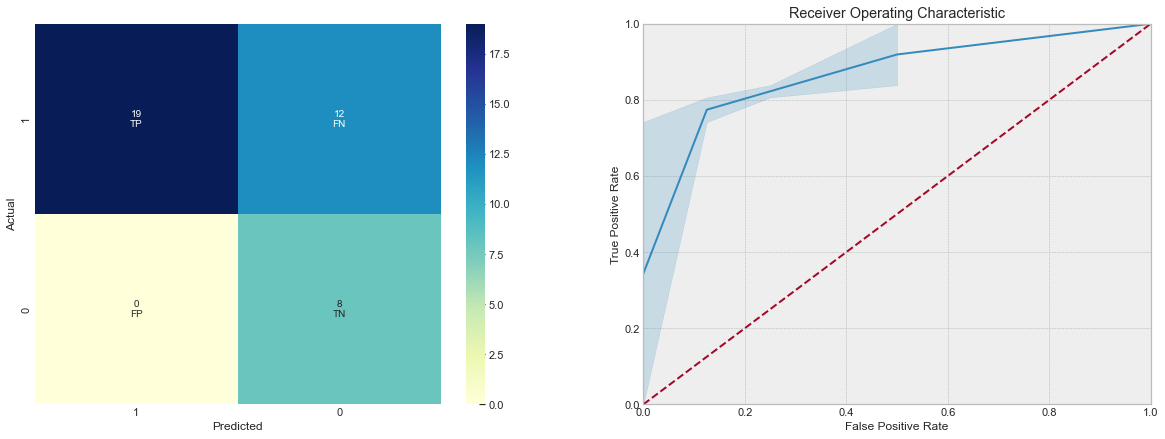

In [257]:
gnb = GaussianNB(priors=None, var_smoothing=1e-09)

parkinsons_disease_prediction("Gaussian Naïve Bayes", gnb, x_train, x_test, y_train, y_test, plot=True)

### Support Vector Classifier

Classification report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.91      1.00      0.95        31

    accuracy                           0.92        39
   macro avg       0.96      0.81      0.86        39
weighted avg       0.93      0.92      0.92        39

Area under the curve:  0.8125


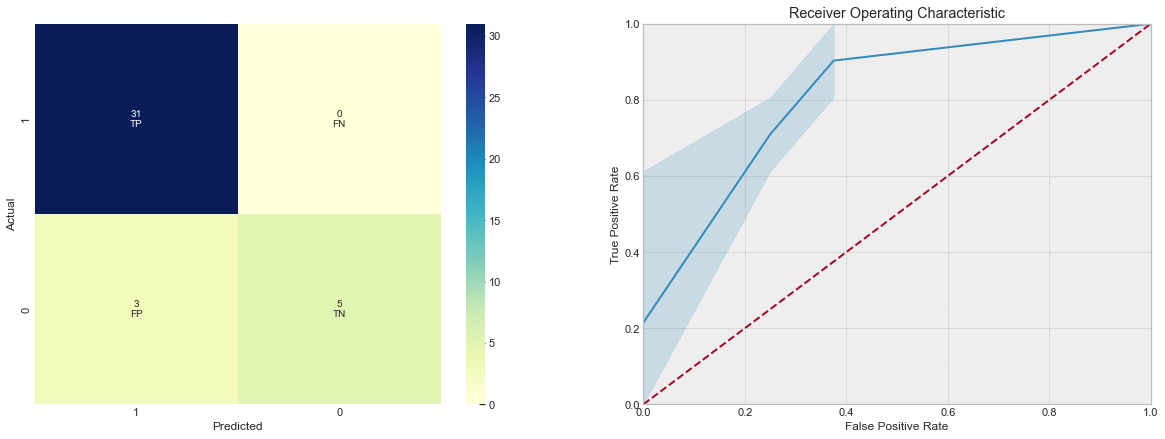

In [258]:
svc = SVC(C=1.0, kernel='linear', degree= 2, gamma=1.0, random_state=None,
          coef0=0.0, shrinking=True, probability=True,tol=0.001,
          cache_size=200, class_weight=None, verbose=False,max_iter= -1)

parkinsons_disease_prediction("Support Vector Classifier", svc, x_train, x_test, y_train, y_test, plot=True)

## Stack and train meta-classifier

Accuracy: 0.85 (+/- 0.05) [Logistic Regression]
Accuracy: 0.81 (+/- 0.06) [KNN]
Accuracy: 0.84 (+/- 0.06) [Support Vector]
Accuracy: 0.81 (+/- 0.06) [StackingClassifier]


Classification report:
              precision    recall  f1-score   support

           0       1.00      0.62      0.77         8
           1       0.91      1.00      0.95        31

    accuracy                           0.92        39
   macro avg       0.96      0.81      0.86        39
weighted avg       0.93      0.92      0.92        39

Area under the curve:  0.8125


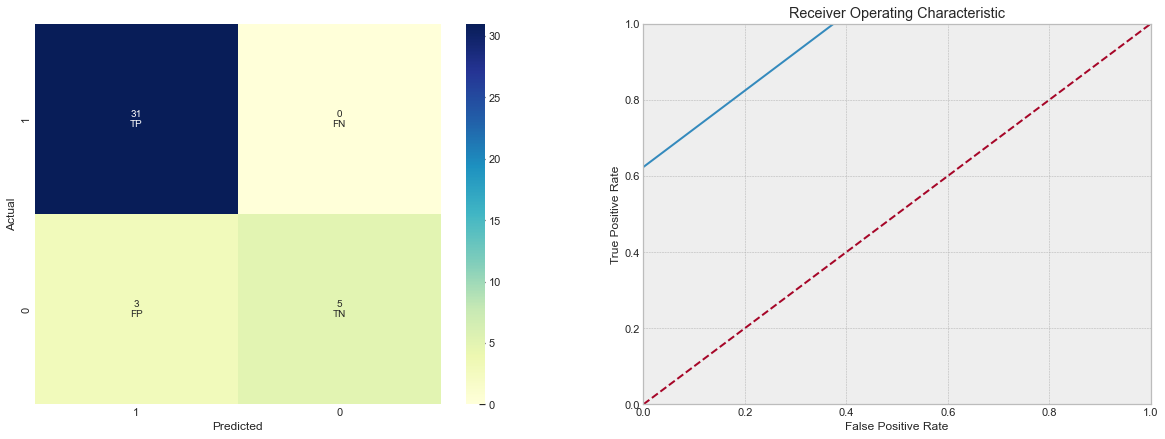

In [259]:
sclf = StackingCVClassifier(classifiers=[lr, knn, svc],
                            meta_classifier=LogisticRegression(),
                            random_state=42)

for clf, label in zip([lr, knn, svc, sclf], ["Logistic Regression" , 'KNN', 'Support Vector', 'StackingClassifier']):

    scores = model_selection.cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
print("\n")
parkinsons_disease_prediction("Stacking Classifier", sclf, x_train, x_test, y_train, y_test, plot=True)

## Ensemble models

### Random Forest

Classification report:
              precision    recall  f1-score   support

           0       0.71      0.62      0.67         8
           1       0.91      0.94      0.92        31

    accuracy                           0.87        39
   macro avg       0.81      0.78      0.79        39
weighted avg       0.87      0.87      0.87        39

Area under the curve:  0.780241935483871


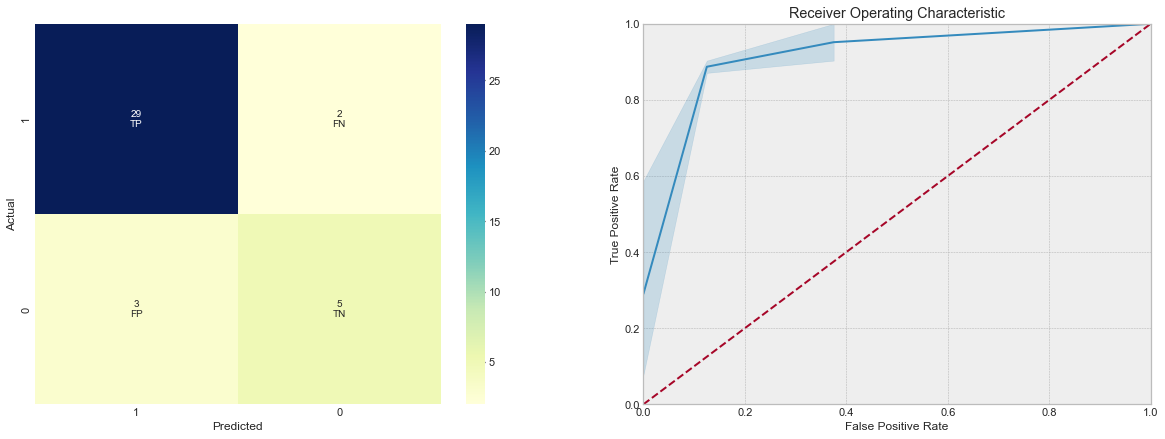

In [260]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForestClassifier without min_impurity_split parameter
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, criterion="gini",
                             min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0,
                             bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0,
                             warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

# Assuming parkinsons_disease_prediction is a function that you have defined elsewhere
parkinsons_disease_prediction("Random Forest", rfc,x_train, x_test, y_train, y_test, plot=True)


## BaggingClassifier

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71         8
           1       0.93      0.90      0.92        31

    accuracy                           0.87        39
   macro avg       0.80      0.83      0.81        39
weighted avg       0.88      0.87      0.87        39

Area under the curve:  0.8266129032258065


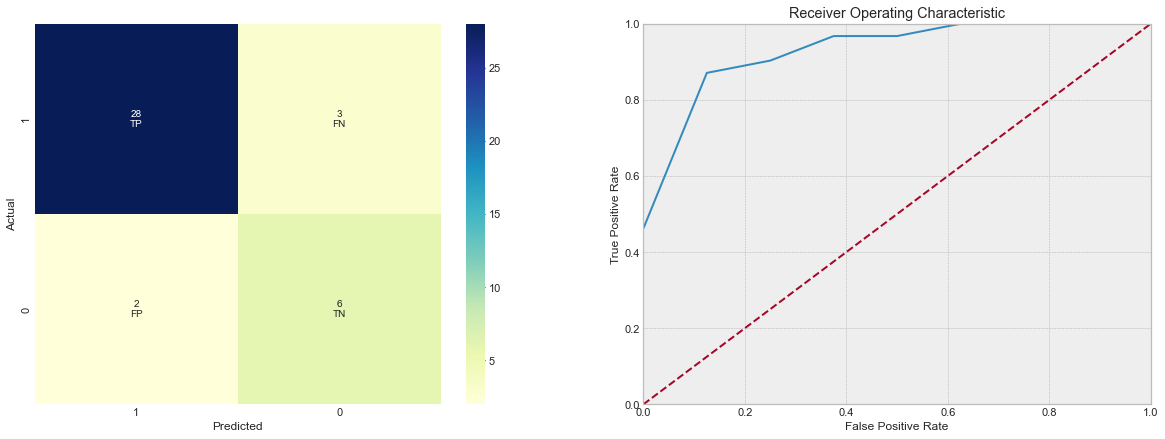

In [261]:
bcc = BaggingClassifier()

parkinsons_disease_prediction("Bagging Classifier", bcc,x_train, x_test, y_train, y_test, plot=True)

## AdaBoost

Classification report:
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         8
           1       0.88      0.94      0.91        31

    accuracy                           0.85        39
   macro avg       0.77      0.72      0.74        39
weighted avg       0.84      0.85      0.84        39

Area under the curve:  0.717741935483871


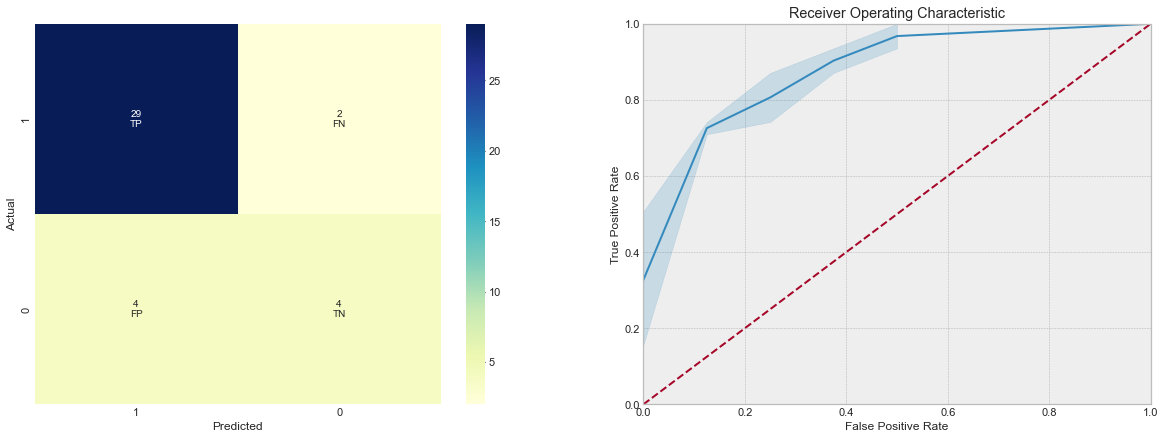

In [262]:
abc = AdaBoostClassifier(base_estimator=None, learning_rate=0.06, algorithm='SAMME.R')


parkinsons_disease_prediction("AdaBoost", abc,x_train, x_test, y_train, y_test, plot=True)

## XGBoost

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.75      0.75         8
           1       0.94      0.94      0.94        31

    accuracy                           0.90        39
   macro avg       0.84      0.84      0.84        39
weighted avg       0.90      0.90      0.90        39

Area under the curve:  0.842741935483871


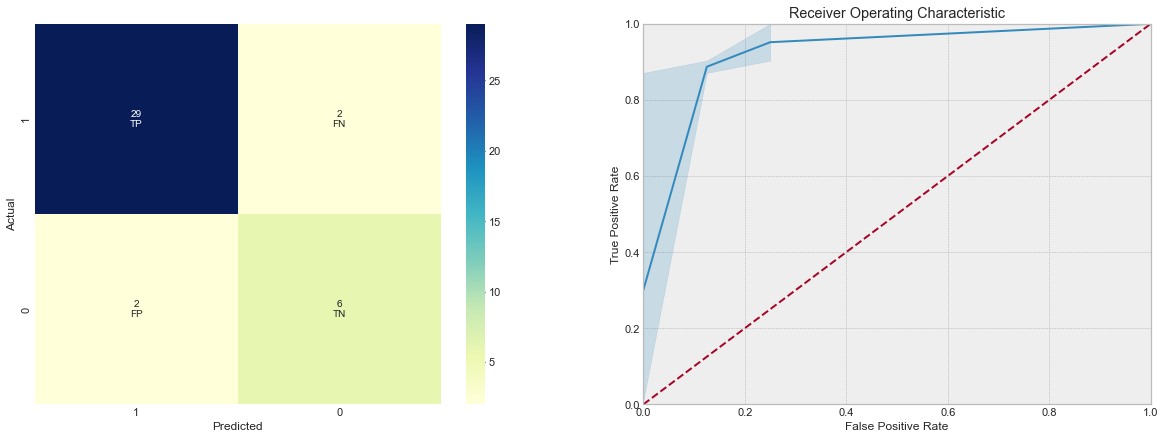

In [263]:
from xgboost import XGBClassifier
import numpy as np

xgc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                    colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
                    max_depth=6, min_child_weight=1, missing=np.nan, n_estimators=50,
                    objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1,
                    scale_pos_weight=1, subsample=0.8)

parkinsons_disease_prediction("XGBoost", xgc, x_train, x_test, y_train, y_test, plot=True)


## All Above Confusion Matrix side by side comparison

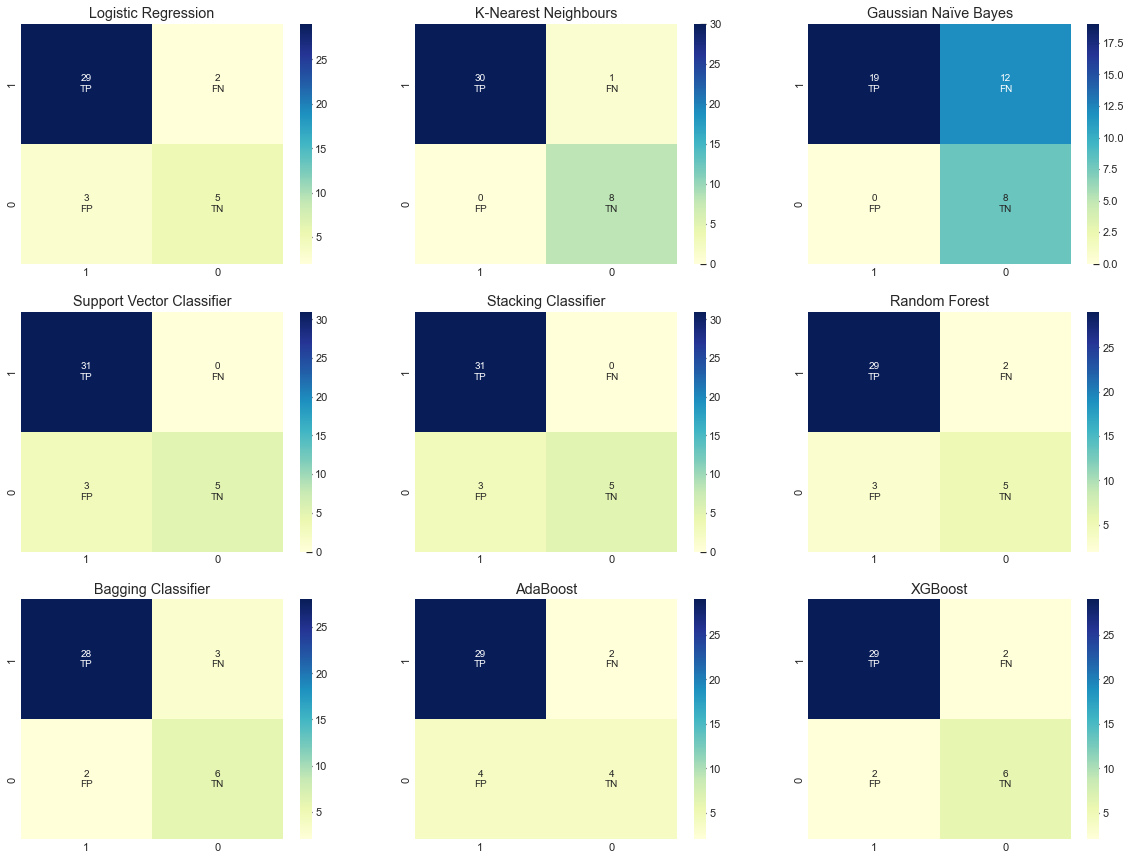

In [264]:
import math
fig, axes = plt.subplots(3,3, figsize = (20, 15))

cnt = 0
for r in range(4):
    for c in range(4):
        try:
            conf_matrix = np.flip(list(conf_matrix_all.values())[cnt])
            labels = np.array([['\nTP','\nFN'],['\nFP','\nTN']])
            labels = np.core.defchararray.add(conf_matrix.astype(str), labels)

            sns.heatmap(conf_matrix, fmt='', annot = labels, ax=axes[r, c], cmap="YlGnBu", xticklabels=[1, 0], yticklabels=[1, 0]);
            axes[r, c].set(title=list(conf_matrix_all.keys())[cnt])
            cnt += 1
        except:
            pass

# Model Training

### Using Support Vector Machine 


In [265]:
from sklearn import svm


In [266]:
from sklearn.svm import SVC

# Instantiate the SVM model
svm_model = SVC(kernel='linear')

# Train the SVM model with training data
svm_model.fit(x_train, y_train)


SVC(kernel='linear')

# Model Evaluation


### Accuracy Score

In [267]:
# Accuracy Score on training data
X_train_pred = svm_model.predict(x_train)
training_data_accuracy = accuracy_score(y_train, X_train_pred)


In [268]:
print('Accuracy (Training Data) :', training_data_accuracy*100, '%')

Accuracy (Training Data) : 91.66666666666666 %


In [269]:
# Accuracy Score on test data
X_test_pred = svm_model.predict(x_test)
testing_data_accuracy = accuracy_score(y_test, X_test_pred)

In [270]:
print('Accuracy (Testing Data) :', testing_data_accuracy*100, '%')

Accuracy (Testing Data) : 92.3076923076923 %


## Predictive System

In [271]:
#from sklearn.preprocessing import StandardScaler
#import numpy as np


# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to your training data
scaler.fit(x_train)

# Now you can transform your input data using the fitted scaler
input_data =(0.63239631, -0.02731081, -0.87985049,  0.36806203,  0.14406765,         0.49280653,  0.30476869,  0.49170115, -0.3137565 , -0.32592164,        -0.25848708, -0.23791175, -0.33873289, -0.25879402, -0.2113724 ,        -0.61257363,  0.87112118,  0.24786644,  0.19888239, -0.97586547,        -0.55160318,  0.07769494         )
input_data_numpy = np.asarray(input_data)

# Reshape the numpy array 
input_data_reshape = input_data_numpy.reshape(1, -1)

# Standardize the input data using the fitted scaler
std_data = scaler.transform(input_data_reshape)

# Now you can use the standardized data for prediction
# prediction
prediction = svm_model.predict(std_data)
print(prediction)

if (prediction[0] == 1):
  print('This person has Parkinson disease')
elif (prediction[0] == 0):
  print('This person does not have Parkinson disease')
else:
  print('Some error in processing please provide sufficient and relevant data ')


[1]
This person has Parkinson disease


## Extracting the ML Model


### Using Pickle

In [272]:
import pickle

# Save the model to a file
with open('model_pickle_model.pkl', 'wb') as file:
    pickle.dump(svm_model, file)

# Load the model from the file
with open('model_pickle_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)